This ipynb is created for primarily exploratory data analysis. Containing plots of relationship between different sets of variables by years.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary import *
import zipfile
import statsmodels.api as sm


sns.set_theme(style="ticks")



In [2]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [2]:
df = pd.read_csv('data/result.csv')
# pd.options.display.max_columns = None
df_index = df.set_index('country')
df.head()


country isocode  patience  risktaking  posrecip  negrecip  altruism  \
0  Afghanistan     AFG -0.201360    0.120764  0.289641  0.254712  0.166455   
1      Algeria     DZA  0.059815    0.391530 -0.598255  0.254901 -0.009968   
2    Argentina     ARG -0.229308    0.041503  0.159679 -0.140457  0.027347   
3    Australia     AUS  0.657004    0.137137  0.069660  0.022190  0.155331   
4      Austria     AUT  0.608285   -0.061829  0.161047 -0.055415 -0.035363   

      trust  demo2019  demo2018  ...  gni2010  gni2011  gni2012  gni2013  \
0  0.315964      2.85      2.97  ...      NaN      NaN      NaN      NaN   
1 -0.177371      4.01      3.50  ...      NaN     27.6      NaN      NaN   
2 -0.206733      7.02      7.02  ...     44.5     42.7     41.4     41.0   
3  0.298973      9.09      9.09  ...     34.7      NaN      NaN      NaN   
4  0.154628      8.29      8.29  ...     30.3     30.8     30.5     30.8   

   gni2014  gni2015  gni2016  gni2017  gni2018  gni2019  
0      NaN      NaN      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN      NaN      NaN  
2     41.7      NaN     42.0     41.2     41.4      NaN  
3     34.4      NaN      NaN      NaN      NaN      NaN  
4     30.5     30.5     30.8     29.7      NaN      NaN  

[5 rows x 181 columns]

# 1. Altruism to humanitarian donation per GDP
# 2003 ~ 2019


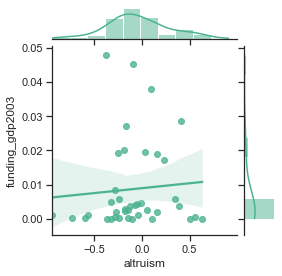

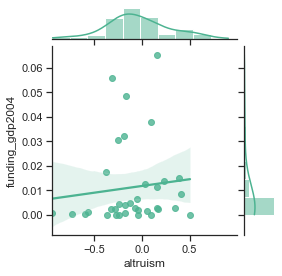

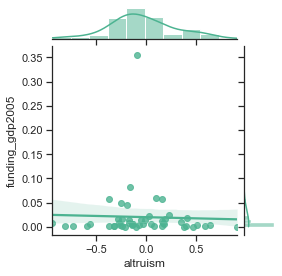

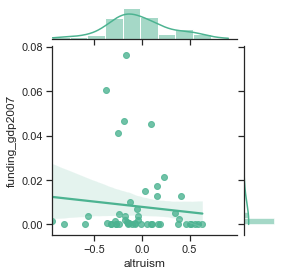

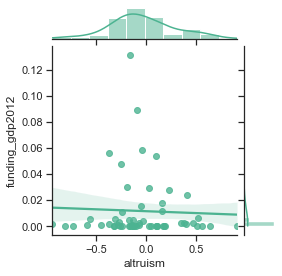

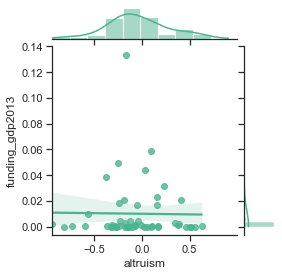

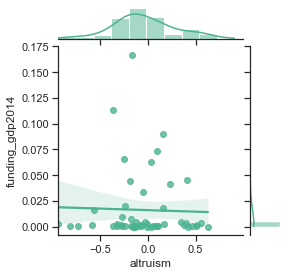

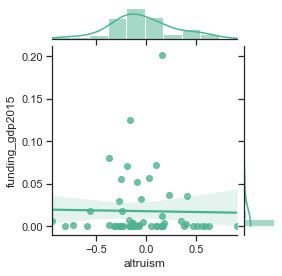

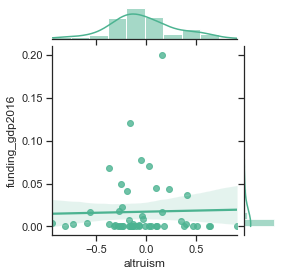

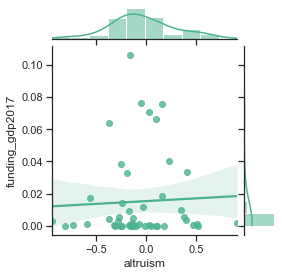

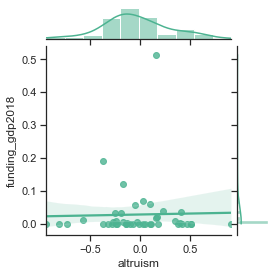

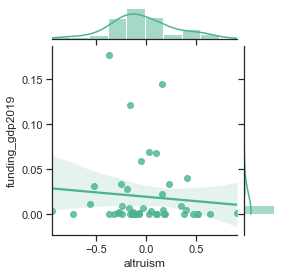

In [3]:
for i in range(17):
    y = add_prefix(i + 3, prefix='funding_gdp') 
    regplot('altruism', y,  df)


# 2. Altruism to democratic index 
# 2006 ~ 2019
# summary: stable negative correlation 

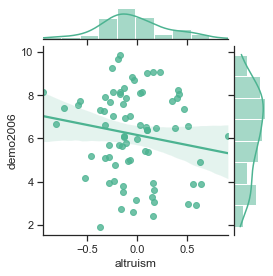

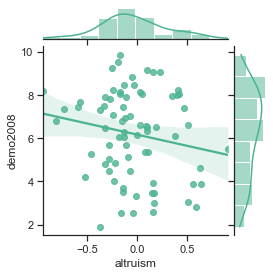

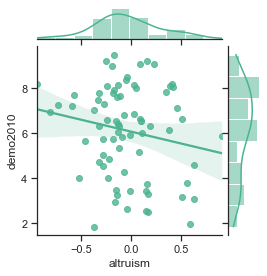

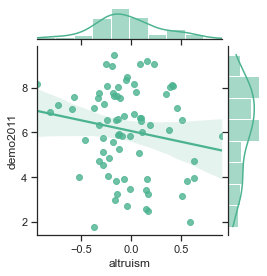

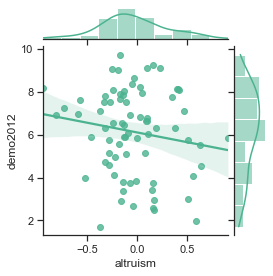

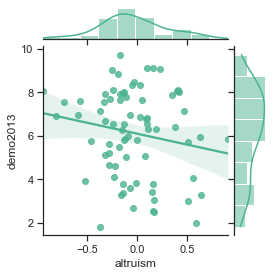

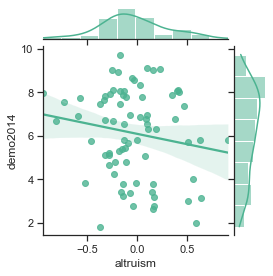

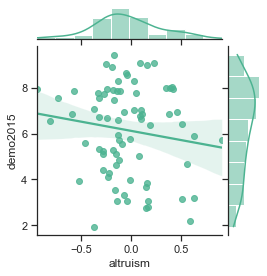

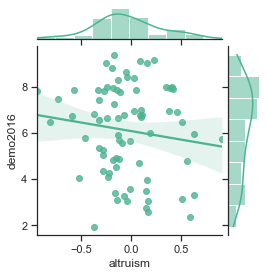

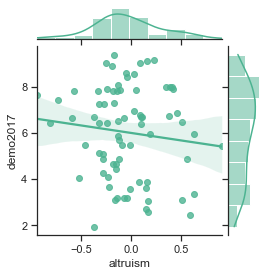

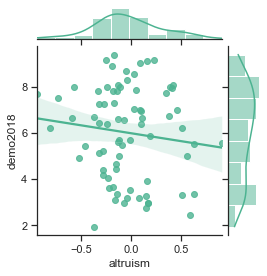

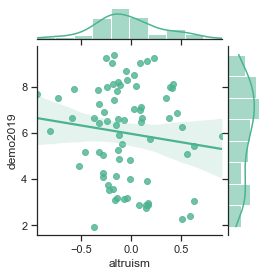

In [4]:
demo_year = sorted([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,  2008, 2006])
for i in range(len(demo_year)):
    y = 'demo' + str(demo_year[i])
    regplot('altruism', y,  df)


# 3. altruism to humanitarian donation per GDP shading by democratic index
# 2006 ~ 2019


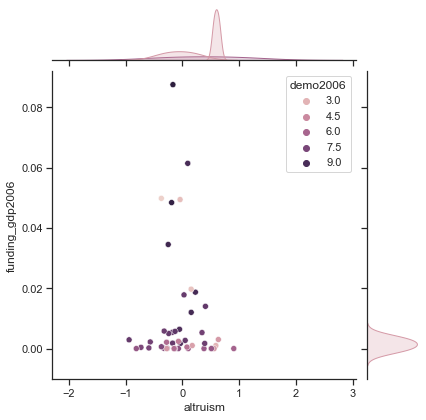

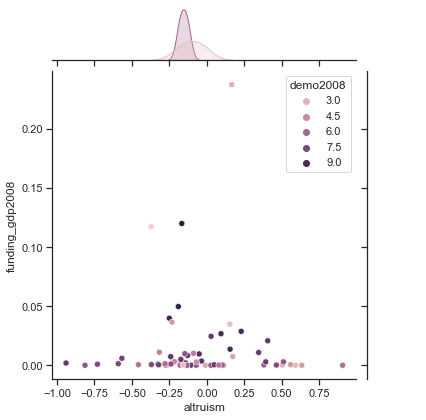

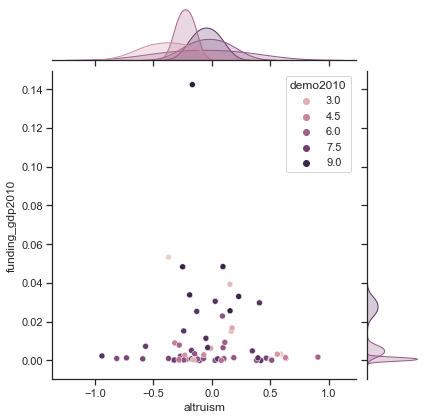

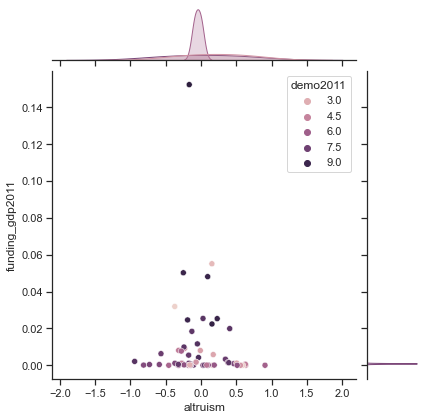

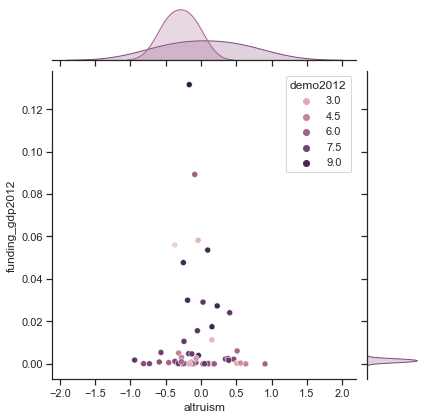

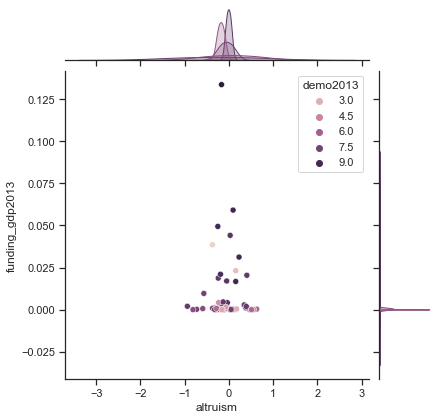

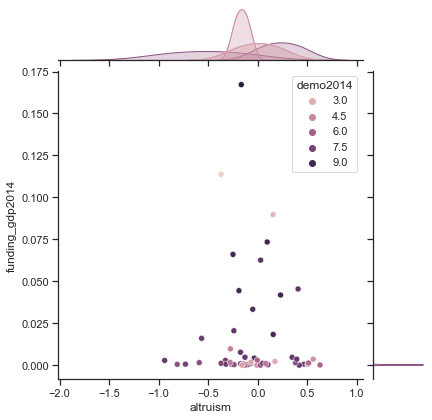

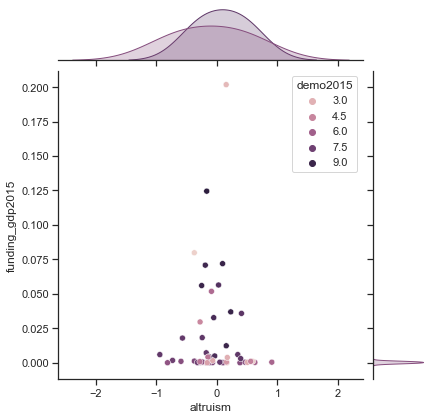

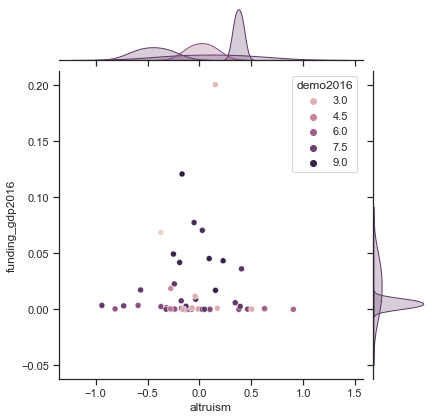

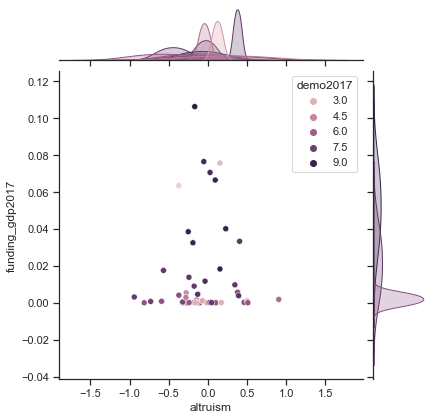

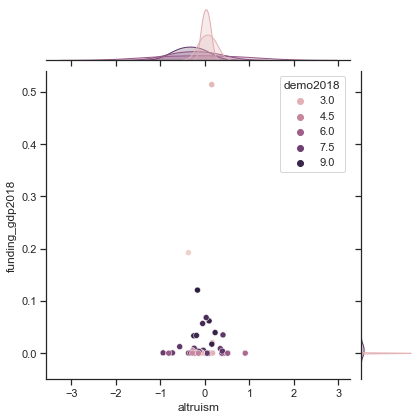

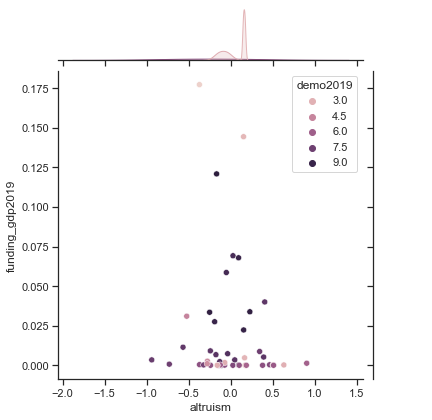

In [5]:
for i in range(len(demo_year)):
    z = 'demo' + str(demo_year[i])
    y = f'funding_gdp{demo_year[i]}'
    scatterplot('altruism', y, z, df)

# 4. listing country has maximum humanitarian donation per GDP by year
# 2003 ~ 2019
# summary: mixing of some most and least democratic countries

In [6]:
df_filter = df_index.filter(regex='funding_gdp.*')
df_filter.idxmax()


funding_gdp2003            Saudi Arabia
funding_gdp2004    United Arab Emirates
funding_gdp2005                  Malawi
funding_gdp2006                  Sweden
funding_gdp2007                  Sweden
funding_gdp2008             Afghanistan
funding_gdp2009                  Sweden
funding_gdp2010                  Sweden
funding_gdp2011                  Sweden
funding_gdp2012                  Sweden
funding_gdp2013                  Sweden
funding_gdp2014                  Sweden
funding_gdp2015    United Arab Emirates
funding_gdp2016    United Arab Emirates
funding_gdp2017                  Sweden
funding_gdp2018    United Arab Emirates
funding_gdp2019            Saudi Arabia
dtype: object

# 5. listing country has maximum humanitarian donation by year
# 2003 ~ 2019
# comment: United State always donate the most 

In [7]:
# df_index = df.set_index('country')
df_filter = df_index.filter(regex='funding_gdp[0-9]+$')
df_filter.idxmax()

funding_gdp2003            Saudi Arabia
funding_gdp2004    United Arab Emirates
funding_gdp2005                  Malawi
funding_gdp2006                  Sweden
funding_gdp2007                  Sweden
funding_gdp2008             Afghanistan
funding_gdp2009                  Sweden
funding_gdp2010                  Sweden
funding_gdp2011                  Sweden
funding_gdp2012                  Sweden
funding_gdp2013                  Sweden
funding_gdp2014                  Sweden
funding_gdp2015    United Arab Emirates
funding_gdp2016    United Arab Emirates
funding_gdp2017                  Sweden
funding_gdp2018    United Arab Emirates
funding_gdp2019            Saudi Arabia
dtype: object

# 6. nominal GDP growth rate to funding
# 2004 ~ 2019
# summary: mostly negative correlated


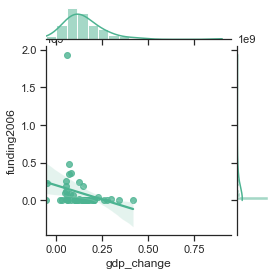

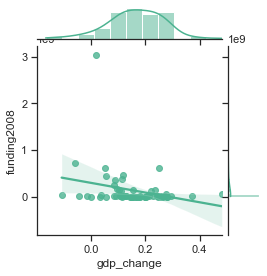

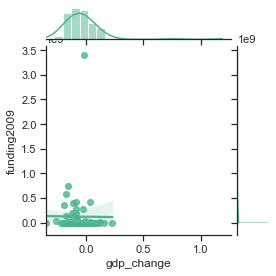

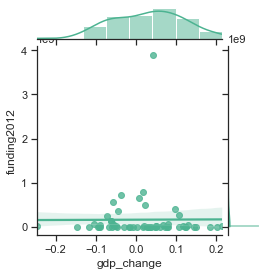

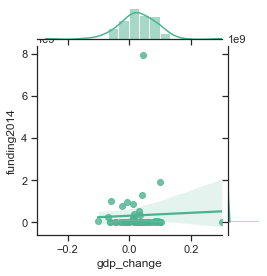

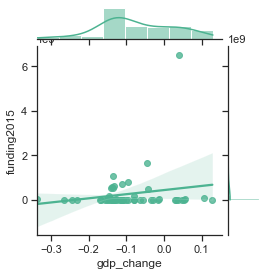

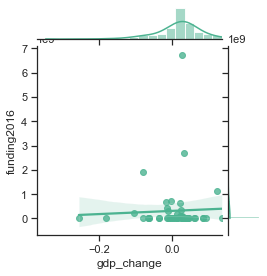

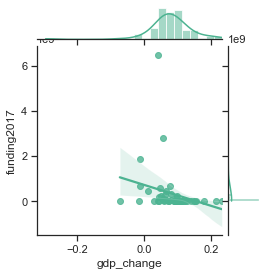

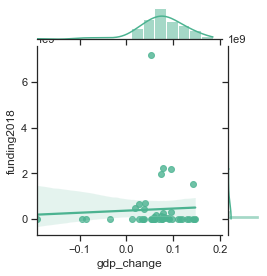

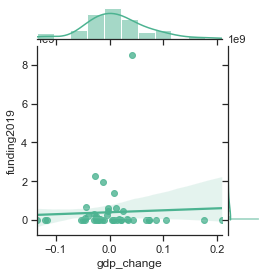

In [8]:

for i in range(16):
    gdp_last = add_prefix(i + 3, prefix='gdp')
    gdp_this = add_prefix(i + 4, prefix='gdp')
    df['gdp_change'] = df[gdp_this].div(df[gdp_last]).sub(1)
    y = add_prefix(i + 4, prefix='funding')
    regplot('gdp_change', y, df)

# 7. democratic to gdp
# 2006 ~ 2019
# summary: mild but clear positive correlation

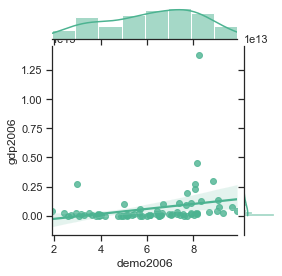

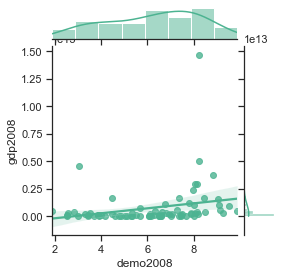

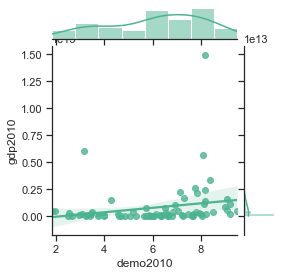

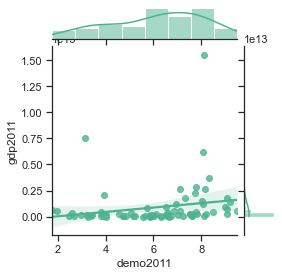

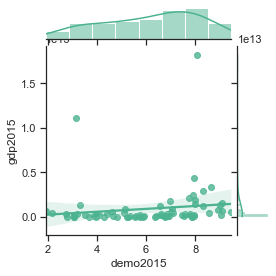

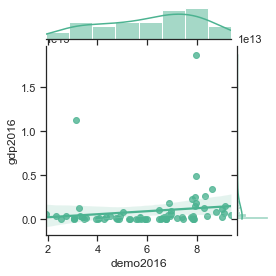

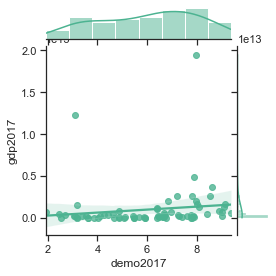

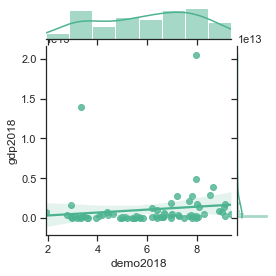

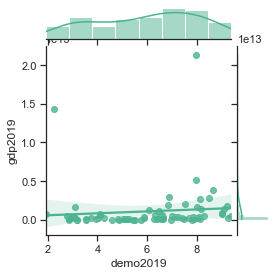

In [9]:
for i in range(len(demo_year)):
    x = 'demo' + str(demo_year[i])
    y = f'gdp{demo_year[i]}'
    regplot(x, y, df)

# 8. average funding per GDP to altruism categorize by receive aid or not
# 2003 ~ 2019

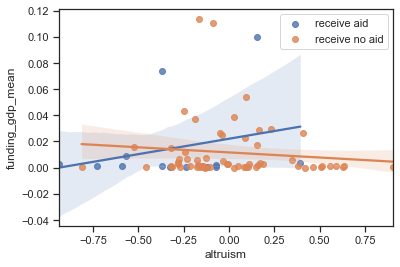

In [10]:
df_index['funding_gdp_mean'] = mean_country('funding_gdp[0-9]+', df)

df_true = df_index.query('aid == 1')
df_false = df_index.query('aid == 0')

sns.regplot('altruism', 'funding_gdp_mean', df_true, label='receive aid').legend()
sns.regplot('altruism', 'funding_gdp_mean', df_false, label='receive no aid').legend()


# 9. average funding per GDP to altruism categorize by donate ODA or not
# 2003 ~ 2019

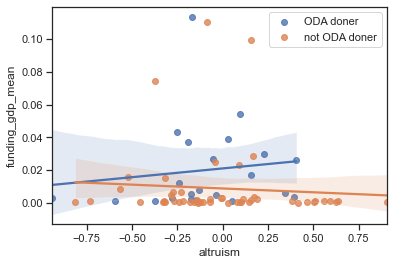

In [13]:

df_true = df_index.query('oda_int == 1')
df_false = df_index.query('oda_int == 0')

sns.regplot('altruism', 'funding_gdp_mean', df_true, label='ODA doner').legend()
sns.regplot('altruism', 'funding_gdp_mean', df_false, label='not ODA doner').legend()

# 10. average funding per GDP to altruism categorize by international group belong to in 2019
# 2003 ~ 2019

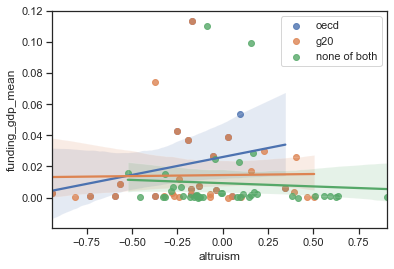

In [15]:

df_oecd = df_index.query('oecd == 1')
df_g20 = df_index.query('g20 == 1')

df_false = df_index.query('oecd == 0 & g20 == 0')

sns.regplot('altruism', 'funding_gdp_mean', df_oecd, label='oecd').legend()
sns.regplot('altruism', 'funding_gdp_mean', df_g20, label='g20').legend()
sns.regplot('altruism', 'funding_gdp_mean', df_false, label='none of both').legend()

# 11. average funding per GDP to altruism categorize by country income type
# 2003 ~ 2019

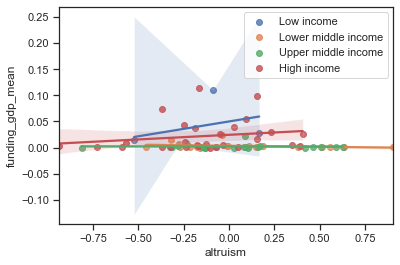

In [11]:
income = df['income_type'].unique().tolist()

for i in range(len(income)):
    df_select = df_index.query(f'income_type == "{income[i]}"')
    sns.regplot('altruism', 'funding_gdp_mean', df_select, label=f'{income[i]}').legend()



# 12. average funding per GDP to altruism categorize by region
# 2003 ~ 2019

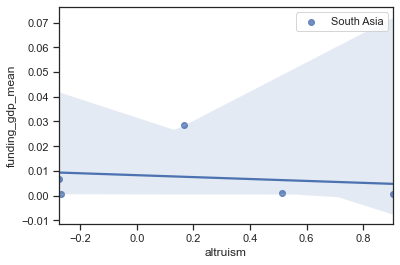

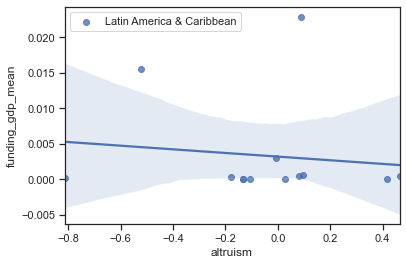

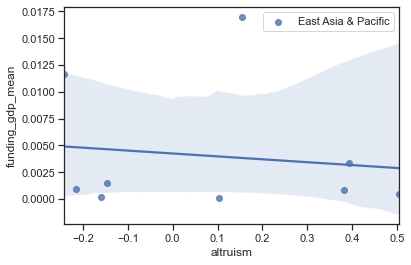

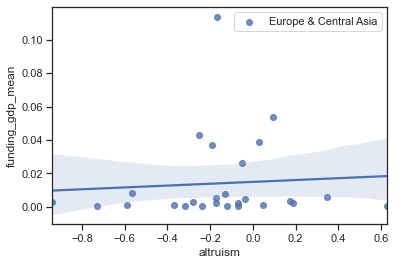

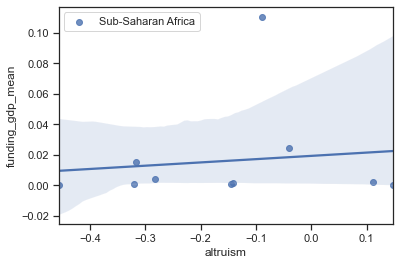

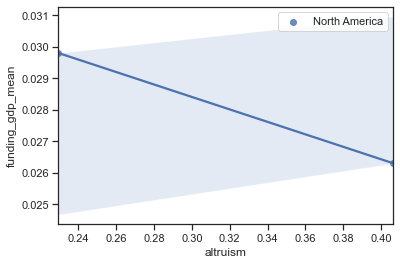

In [12]:
region = df['region'].unique().tolist()

for i in range(len(region)):
    df_select = df_index.query(f'region == "{region[i]}"')
    plt.figure()
    sns.regplot('altruism', 'funding_gdp_mean', df_select, label=f'{region[i]}', ).legend()

